In [3]:
import matplotlib.pyplot as plt
original_grid = plt.grid

# Define a wrapper function that applies custom grid and tick settings
def grid_proxy(*args, **kwargs):
    # Apply custom grid settings
    kwargs.setdefault('which', 'both')
    kwargs.setdefault('linestyle', '--')
    kwargs.setdefault('linewidth', 0.5)
    
    # Call the original plt.grid function with the updated settings
    original_grid(*args, **kwargs)
    
    # Automatically turn on minor ticks
    plt.minorticks_on()
    
    # Apply custom minor tick parameters
    plt.tick_params(which='minor', length=4, color='r')

# Override plt.grid with the proxy function
plt.grid = grid_proxy

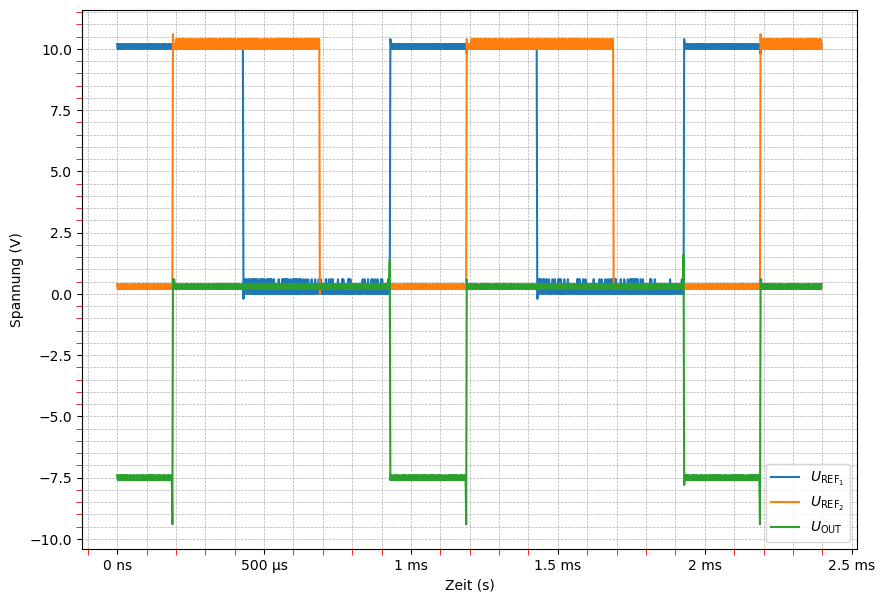

In [11]:
import pandas as pd

# Load the CSV file
file_path = 'klein_als_1k_unten_2.csv'
data = pd.read_csv(file_path)
dt=data['Increment'][0]
from matplotlib.ticker import FuncFormatter

# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')


# Removing the first row which contains metadata and converting the sequence column to numeric
data_cleaned = data.drop(index=0)
data_cleaned['X'] = pd.to_numeric(data_cleaned['X'])*dt

# Converting the voltage columns to numeric values
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
data_cleaned['CH3'] = pd.to_numeric(data_cleaned['CH3'], errors='coerce')

# Plotting the cleaned data
plt.figure(figsize=(10, 7))
a=0
t=2000
plt.plot(data_cleaned['X'], data_cleaned['CH1'], label='$U_{\mathrm{REF}_1}$')
plt.plot(data_cleaned['X'], data_cleaned['CH2'], label='$U_{\mathrm{REF}_2}$')
plt.plot(data_cleaned['X'][a:a+t], data_cleaned['CH3'][a:a+t], label='$U_{\mathrm{OUT}}$')

# Adding title and labels
#plt.title('')
plt.xlabel('Zeit (s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.ylabel('Spannung (V)')
plt.grid()
plt.legend()
plt.savefig("klein_als_1k_unten.pdf")
# Show plot
plt.show()

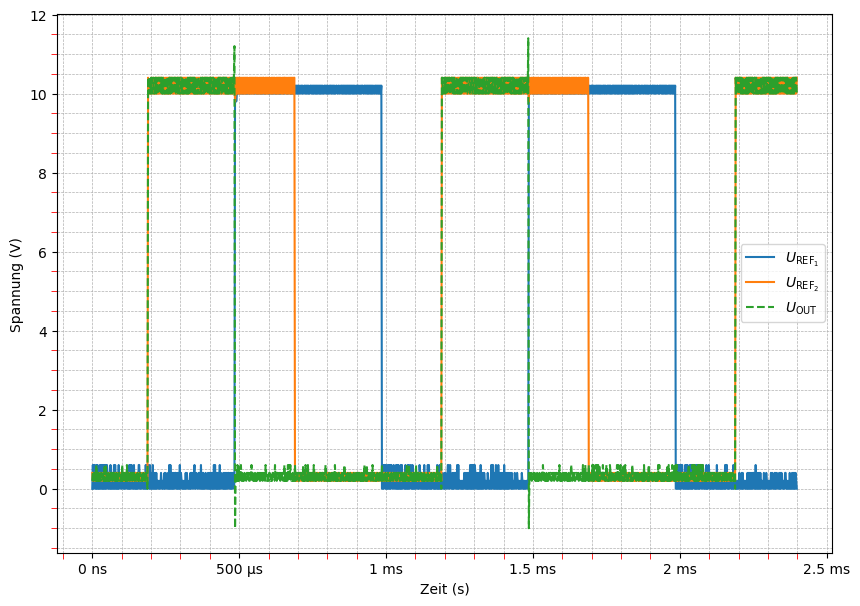

In [16]:
import pandas as pd

# Load the CSV file
file_path = 'mehr_als_1k_oben.csv'
data = pd.read_csv(file_path)
dt=data['Increment'][0]
from matplotlib.ticker import FuncFormatter

# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')


# Removing the first row which contains metadata and converting the sequence column to numeric
data_cleaned = data.drop(index=0)
data_cleaned['X'] = pd.to_numeric(data_cleaned['X'])*dt

# Converting the voltage columns to numeric values
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
data_cleaned['CH3'] = pd.to_numeric(data_cleaned['CH3'], errors='coerce')

# Plotting the cleaned data
plt.figure(figsize=(10, 7))
a=0
t=2000
plt.plot(data_cleaned['X'], data_cleaned['CH1'], label='$U_{\mathrm{REF}_1}$')
plt.plot(data_cleaned['X'], data_cleaned['CH2'], label='$U_{\mathrm{REF}_2}$')
plt.plot(data_cleaned['X'], data_cleaned['CH3'], label='$U_{\mathrm{OUT}}$', linestyle='--')

# Adding title and labels
#plt.title('')
plt.xlabel('Zeit (s)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.ylabel('Spannung (V)')
plt.grid()
plt.legend()
plt.savefig("mehr_als_1k_oben.pdf")
# Show plot
plt.show()